In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
sys.path.append('/users/mtaranov/LongRange3D/')
from models_motif import LongRangeDNN_FC
from utils import  concat_motifs,get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 2500 MB, cuDNN 5005)


In [2]:
contacts='PE'
path='/users/mtaranov/datasets_3d/dist_matched_'+contacts+'/'

X_train = np.load(path+'motifs/train_'+contacts+'_out_btw_nodes_3_0.0001/mat.npy')
X_test = np.load(path+'motifs/test_'+contacts+'_out_btw_nodes_3_0.0001/mat.npy')
X_valid = np.load(path+'motifs/valid_'+contacts+'_out_btw_nodes_3_0.0001/mat.npy')

y_train = get_labels(path+'y_train_thres_10.npy')
y_test = get_labels(path+'y_test_thres_10.npy')
y_valid = get_labels(path+'y_valid_thres_10.npy')


In [3]:
X_train.shape, X_test.shape, X_valid.shape

((4824, 1920), (1812, 1920), (2872, 1920))

In [4]:
def normalize_features(X_train, X_valid, X_test, normalizer=StandardScaler):
    # fit normalizer
    normalizer = normalizer().fit(X_train[:,:])
    # transform features
    X_train_new=copy.copy(X_train)
    X_valid_new=copy.copy(X_valid)
    X_test_new=copy.copy(X_test)
    X_train_new = normalizer.transform(X_train)
    X_valid_new = normalizer.transform(X_valid)
    X_test_new = normalizer.transform(X_test)

    return (X_train_new, X_valid_new, X_test_new)

In [5]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


In [6]:
from models_motif import LongRangeDNN_FC
dnn_normalized = LongRangeDNN_FC(num_features=1920, use_deep_CNN=False)
validation_data = (X_valid_normalized, y_valid)
dnn_normalized.train(X_train_normalized, y_train, validation_data)

Training model...
Train on 4824 samples, validate on 2872 samples
Epoch 1/100
4750/4824 [============================>.] - ETA: 0s - loss: 4.5549Epoch 0: validation loss: 1.077
Balanced Accuracy: 61.46%	 auROC: 0.725	 auPRC: 0.678	 auPRG: 0.476
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 1s - loss: 4.5074 - val_loss: 1.0769
Epoch 2/100
4750/4824 [============================>.] - ETA: 0s - loss: 1.2376Epoch 1: validation loss: 0.593
Balanced Accuracy: 74.44%	 auROC: 0.824	 auPRC: 0.847	 auPRG: 0.676
Recall at 5%|10%|20% FDR: 40.0%|50.1%|67.1%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 1s - loss: 1.2302 - val_loss: 0.5928
Epoch 3/100
4750/4824 [============================>.] - ETA: 0s - loss: 0.6327Epoch 2: validation loss: 0.476
Balanced Accuracy: 79.53%	 auROC: 0.876	 auPRC: 0.871	 auPRG: 0.791
Recall at 5%|10%|20% FDR: 42.5%|61.8%|79.2%	 Num Positives

In [7]:
print(dnn_normalized.test(X_test_normalized, y_test))
print(dnn_normalized.test(X_train_normalized, y_train))
print(dnn_normalized.test(X_valid_normalized, y_valid))

Balanced Accuracy: 83.50%	 auROC: 0.907	 auPRC: 0.908	 auPRG: 0.858
Recall at 5%|10%|20% FDR: 57.8%|78.6%|86.2%	 Num Positives: 906	 Num Negatives: 906	 
Balanced Accuracy: 99.98%	 auROC: 1.000	 auPRC: 0.998	 auPRG: 0.999
Recall at 5%|10%|20% FDR: 100.0%|100.0%|100.0%	 Num Positives: 2412	 Num Negatives: 2412	 
Balanced Accuracy: 84.47%	 auROC: 0.916	 auPRC: 0.914	 auPRG: 0.876
Recall at 5%|10%|20% FDR: 67.0%|77.6%|88.2%	 Num Positives: 1436	 Num Negatives: 1436	 


In [8]:
#save model and weights
dnn_normalized.save(contacts+'_dnn_FC_Window_motifs', '/users/mtaranov/LongRange3D/')

# DeepLift

In [9]:
weights='/users/mtaranov/LongRange3D/weights/'+contacts+'_dnn_FC_Window_motifs.weights.h5'
json_model='/users/mtaranov/LongRange3D/models/'+contacts+'_dnn_FC_Window_motifs.arch.json'

In [10]:
scores = dnn_normalized.deeplift(X_valid_normalized, weights, json_model, batch_size=128)

True
nonlinear_mxts_mode is set to: Gradient


In [11]:
np.save('/users/mtaranov/LongRange3D/deeplift_scores/'+contacts+'_scores_dnn_FC_Window_motifs.npy', scores)

In [12]:
scores.shape

(2872, 1920)

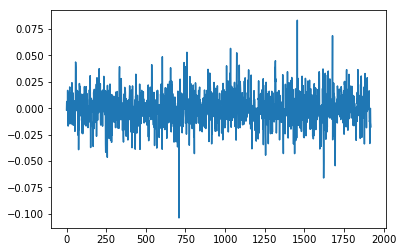

In [13]:
plt.plot(np.mean(scores[10:,:], axis=0))

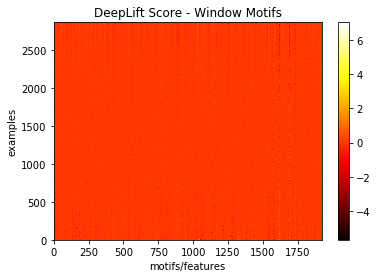

In [14]:
plt.pcolor(scores[10:,:], cmap='hot', vmin=np.min(scores[10:,:]), vmax=np.max(scores[10:,:])) # cmap='RdBu'
plt.xlabel('motifs/features')
plt.ylabel('examples')
plt.title('DeepLift Score - Window Motifs')
plt.colorbar()

In [15]:
motif_names=np.loadtxt('/users/mtaranov/datasets_3d/dist_matched_PE/motifs/train_PE_out_btw_nodes_3_0.0001/motif_names.txt', dtype=str, delimiter='/')[:,6:].reshape(640,)
top_3_hits_names=[]
for i in motif_names:
    for j in range(3):
        top_3_hits_names.append(i)
top_3_hits_names = np.array(top_3_hits_names)

In [21]:
score_per_feature=np.mean(scores, axis=0)

In [30]:
DeepLift_Window_Motifs=top_3_hits_names[score_per_feature.argsort()[::-1]]

In [31]:
np.where(DeepLift_Window_Motifs=='CTCF_HUMAN')

(array([1888, 1910, 1913]),)

In [32]:
DeepLift_Window_Motifs.shape

(1920,)

In [33]:
DeepLift_Window_Motifs[:100]

array(['UBIP1_HUMAN', 'SNAI2_HUMAN', 'HMGA1_HUMAN', 'ZBT7A_HUMAN',
       'VDR_HUMAN', 'TYY1_HUMAN', 'BHE23_HUMAN', 'ZN143_HUMAN',
       'NR2F6_HUMAN', 'TBX1_HUMAN', 'NR2C1_HUMAN', 'ZN143_HUMAN',
       'NR1I2_HUMAN', 'STAT3_HUMAN', 'RUNX2_HUMAN', 'PLAL1_HUMAN',
       'SOX4_HUMAN', 'ZN143_HUMAN', 'PURA_HUMAN', 'TBX1_HUMAN',
       'SPIC_HUMAN', 'TEAD1_HUMAN', 'NR2E3_HUMAN', 'ZN713_HUMAN',
       'PPARG_HUMAN', 'ZBTB4_HUMAN', 'SPIC_HUMAN', 'XBP1_HUMAN',
       'TFEB_HUMAN', 'XBP1_HUMAN', 'TEAD1_HUMAN', 'ZBT7A_HUMAN',
       'NR1I2_HUMAN', 'TBX1_HUMAN', 'HXA11_HUMAN', 'BMAL1_HUMAN',
       'BHE22_HUMAN', 'IRF5_HUMAN', 'TF65_HUMAN', 'NFE2_HUMAN',
       'ZSC16_HUMAN', 'FOXK1_HUMAN', 'LHX6_HUMAN', 'TWST1_HUMAN',
       'RARG_HUMAN', 'BCL6_HUMAN', 'ZIC4_HUMAN', 'NFYA_HUMAN',
       'TEAD3_HUMAN', 'E2F4_HUMAN', 'HSF4_HUMAN', 'IRF7_HUMAN',
       'USF1_HUMAN', 'BHE41_HUMAN', 'MGAP_HUMAN', 'KLF16_HUMAN',
       'DMBX1_HUMAN', 'PAX1_HUMAN', 'SOX1_HUMAN', 'IRF1_HUMAN',
       'MGAP_HUMAN', 'BH